# Importing Libraries

In [1]:
import tensorflow as tf

In [2]:
print(tf.version.VERSION)

2.1.0


In [3]:
import numpy as np
import os
import cv2

In [4]:
path = "myData"
#loading the dataset

The dataset contains 10000+ images of 10 different classes from 0-9, each class carrying around 1000+ images 

In [5]:
images = []
classNo = []
imageDimensions= (32,32,3)
myList = os.listdir(path)
print(myList)
print(len(myList))
noOfClasses = len(myList)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10


In [6]:
for x in range(0,noOfClasses):
    myPicList = os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(x)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
    print(x,end=" ")
#print(images)

0 1 2 3 4 5 6 7 8 9 

In [7]:
#print(classNo)

In [8]:
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)
print(classNo.shape)

(10160, 32, 32, 3)
(10160,)


# Slicing

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=0.2)
#the X_train contains all the images while y_train contains ids of all the images

In [11]:
print(X_train.shape)
print(X_test.shape)

(8128, 32, 32, 3)
(2032, 32, 32, 3)


In [12]:
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=0.2)
print(X_validation.shape)

(1626, 32, 32, 3)


In [13]:
print(len(np.where(y_train==0)[0]))

640


In [14]:
#save all
noOfSamples =[]
for x in range(0,noOfClasses):
    #print(len(np.where(y_train==x)[0]),end=" ")
    noOfSamples.append(len(np.where(y_train==x)[0]))
print(noOfSamples)

[640, 639, 660, 659, 636, 647, 667, 645, 664, 645]


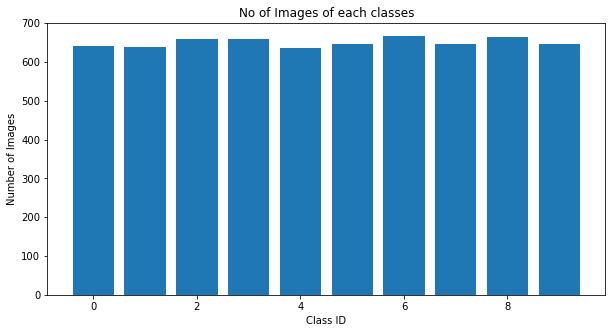

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),noOfSamples)
plt.title("No of Images of each classes")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()
#plotting the bar chart for distribution of images

# Preprocessing of image dataset

In [16]:
def preProcessing(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#convert images to gray scale
    img = cv2.equalizeHist(img)#this statement makes the lighting of the image distribute evenly
    img = img/255 #normalize the images
    return img

In [17]:
'''
img1 = preProcessing(X_train[30])
img1 = cv2.resize(img1,(300,300))
cv2.imshow("Preprocessed",img1)
cv2.waitKey(0)
'''
#to test how one of the image lookslike

'\nimg1 = preProcessing(X_train[30])\nimg1 = cv2.resize(img1,(300,300))\ncv2.imshow("Preprocessed",img1)\ncv2.waitKey(0)\n'

In [18]:
#to run all the X_train images with being preprocessed
#to test one can check the shape of an image before and after pre processing
X_train = np.array(list(map(preProcessing,X_train)))
X_validation = np.array(list(map(preProcessing,X_validation)))
X_test = np.array(list(map(preProcessing,X_test)))

In [19]:
print(X_train.shape)
#adding a depth of 1 in CNN
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(X_train.shape)

(6502, 32, 32)
(6502, 32, 32, 1)


In [20]:
#dooing same for test and validation set
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

# Training the dataset using Tensorflow

In [21]:
#to make the dataset more generic, the dataset is more augmented
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [22]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)
dataGen.fit(X_train)

In [23]:
#one hot encoding of mattrices
from keras.utils.np_utils import to_categorical

In [24]:
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [26]:
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500
    
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(noOfNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model= myModel()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [27]:
#defining the parameters for training
batchSizeVal = 50
epochsVal = 5
stepsPerEpochVal = 500

history = model.fit_generator(dataGen.flow(X_train,y_train,
                                 batch_size=batchSizeVal),
                                 steps_per_epoch=stepsPerEpochVal,
                                 epochs=epochsVal,
                                 validation_data=(X_validation,y_validation),
                                 shuffle=1)

Epoch 1/5
500/500 [==============================] - 78s 157ms/step - loss: 0.5749 - accuracy: 0.8036 - val_loss: 0.0348 - val_accuracy: 0.9865
Epoch 2/5
500/500 [==============================] - 78s 156ms/step - loss: 0.1689 - accuracy: 0.9478 - val_loss: 0.0249 - val_accuracy: 0.9945
Epoch 3/5
500/500 [==============================] - 78s 155ms/step - loss: 0.1369 - accuracy: 0.9585 - val_loss: 0.0120 - val_accuracy: 0.9988
Epoch 4/5
500/500 [==============================] - 78s 156ms/step - loss: 0.0851 - accuracy: 0.9732 - val_loss: 0.0139 - val_accuracy: 0.9957
Epoch 5/5
500/500 [==============================] - 78s 155ms/step - loss: 0.0702 - accuracy: 0.9789 - val_loss: 0.0093 - val_accuracy: 0.9982


# Evalauting the results

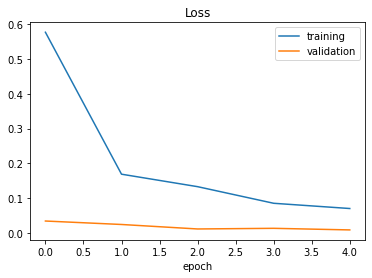

In [28]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.show()

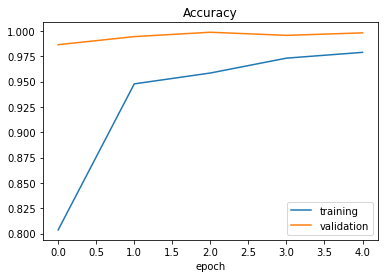

In [29]:
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [30]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test Score = ',score[0])
print('Test Accuracy = ',score[1])

Test Score =  0.012015400530269582
Test Accuracy =  0.9960629940032959


# Saving the model

In [31]:
import pickle
pickle_out= open("model_trained.p", "wb")
pickle.dump(model,pickle_out)
pickle_out.close()